# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.



### 2. Dealing with the data

Already done in the round 2.



### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df = pd.DataFrame(data)

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#generate a new dataframe containing only numerical variables
numerical = pd.DataFrame(df.select_dtypes(np.number))
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [5]:
#make the headers standardized
cols = []

for i in range(len(numerical.columns)):
    cols.append(numerical.columns[i].lower().replace(' ','_'))

numerical.columns = cols

In [6]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [7]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [8]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#check and deal with NaN values
numerical.isna().sum()/len(numerical)*100

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

In [12]:
correlations_matrix = numerical.corr()  
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [13]:
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

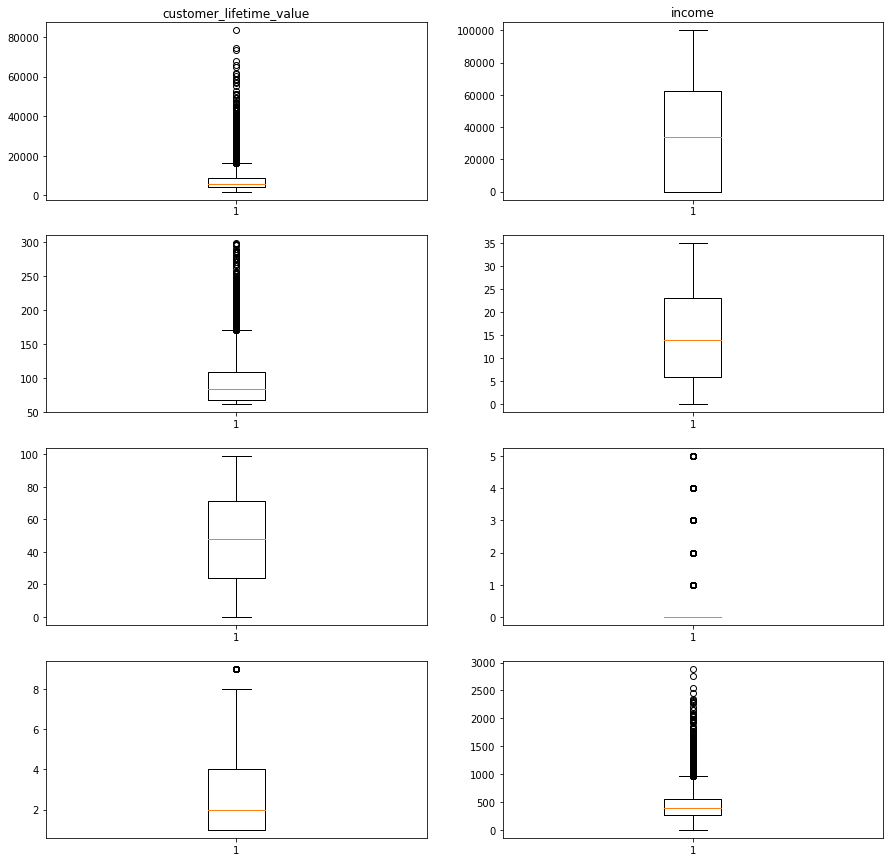

In [14]:
#check for outliers
#how do i get the boxplot "on it's side" without using seaborn (as i want to use the matplotlib subplots function)?

fig, axs = plt.subplots(4, 2, figsize=(15,15))
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

axs[0, 0].boxplot(x=numerical['customer_lifetime_value'])
axs[0, 1].boxplot(x=numerical['income'])
axs[1, 0].boxplot(x=numerical['monthly_premium_auto'])
axs[1, 1].boxplot(x=numerical['months_since_last_claim'])
axs[2, 0].boxplot(x=numerical['months_since_policy_inception'])
axs[2, 1].boxplot(x=numerical['number_of_open_complaints'])
axs[3, 0].boxplot(x=numerical['number_of_policies'])
axs[3, 1].boxplot(x=numerical['total_claim_amount'])

plt.show()

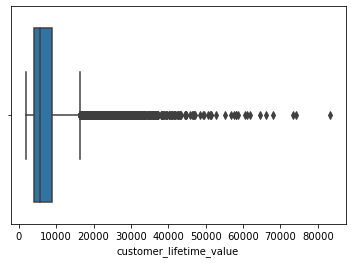

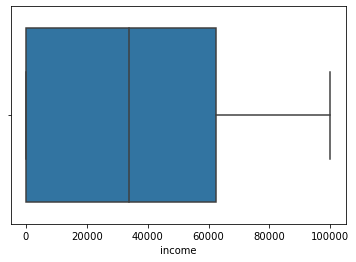

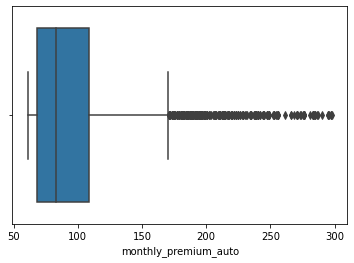

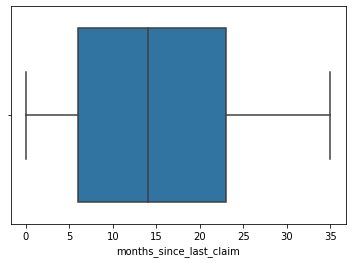

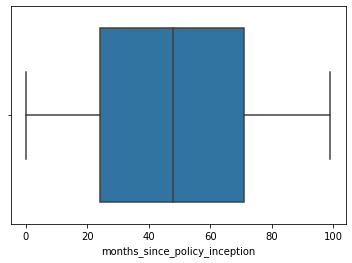

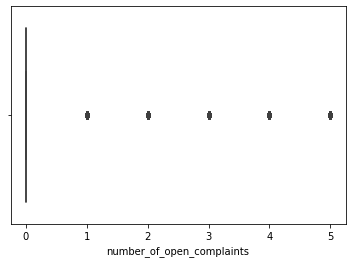

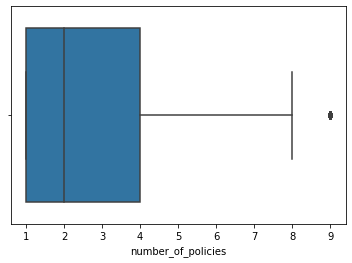

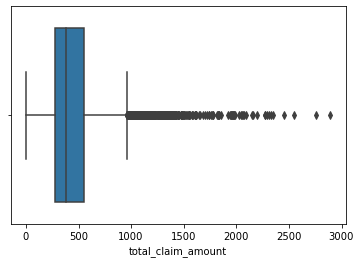

In [15]:
for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

In [16]:
# removing outliers

def remove_outliers(numerical, cols):
    q1 = np.percentile(numerical[cols], 25)
    q3 = np.percentile(numerical[cols], 75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    numerical_new = numerical.loc[(numerical[cols] > lower_bound) & (numerical[cols] < upper_bound)]
    return numerical_new


In [17]:
for column in numerical.columns:
    numerical_new = remove_outliers(numerical, column)

In [18]:
numerical_new = pd.DataFrame(numerical_new)

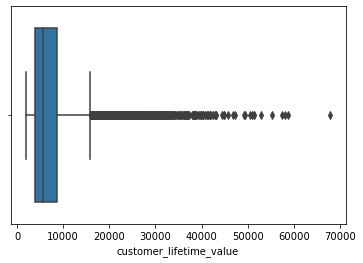

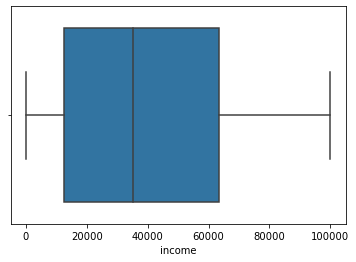

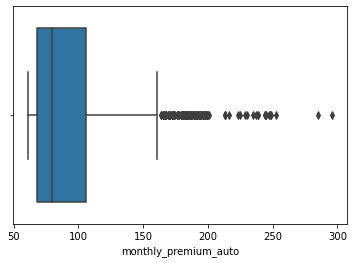

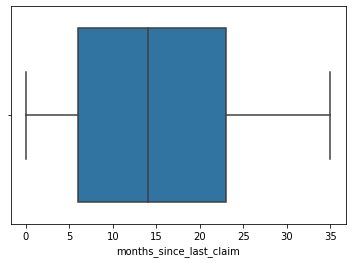

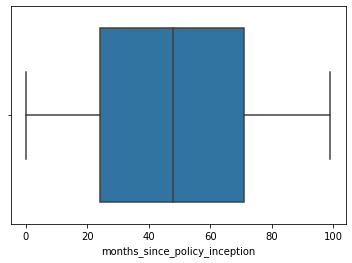

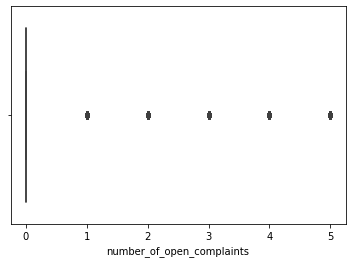

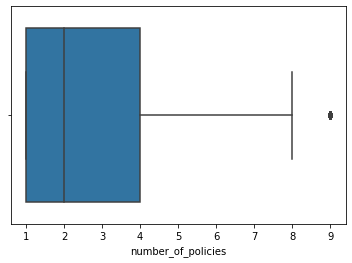

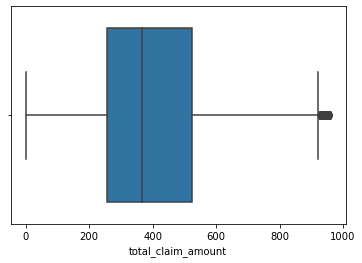

In [19]:
for column in numerical_new.columns:
    sns.boxplot(numerical_new[column])
    plt.show()

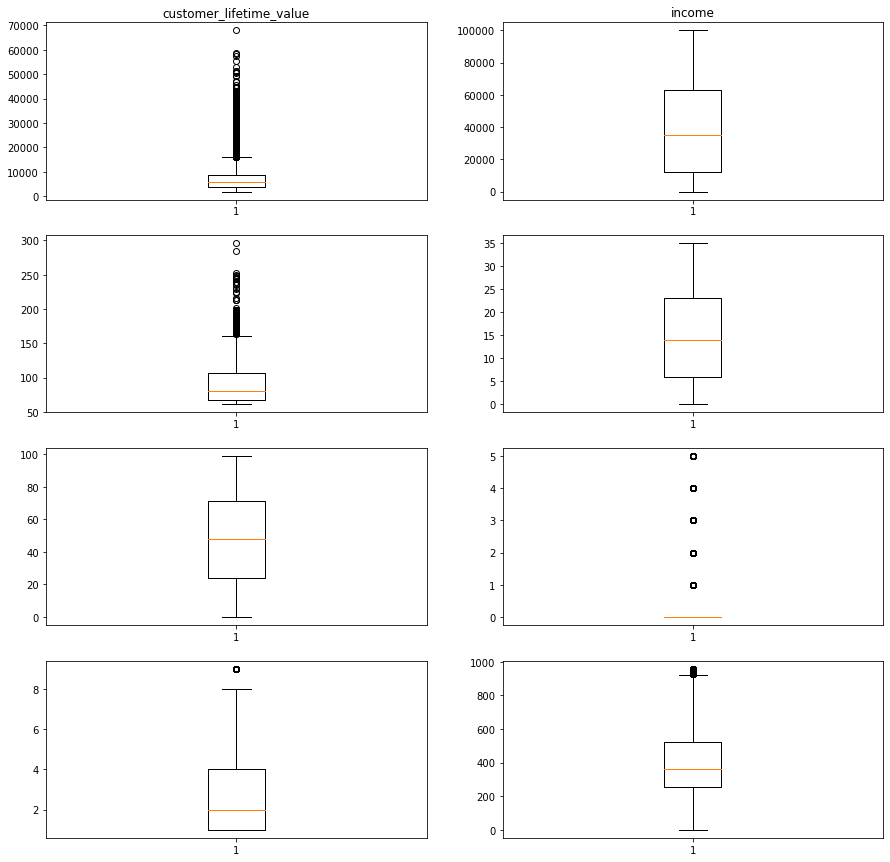

In [20]:
#check if removal of outliers worked
#RESULT: numerical_new has fewer rows than numerical, so it seems like it did something
#BUT: from the boxplots (and later the distplots on the normalized data) i can conclude the function & code was
#not succesful. What am i missing?? I readjusted it tons of times, but cannot see it.

fig, axs = plt.subplots(4, 2, figsize=(15,15))
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

axs[0, 0].boxplot(x=numerical_new['customer_lifetime_value'])
axs[0, 1].boxplot(x=numerical_new['income'])
axs[1, 0].boxplot(x=numerical_new['monthly_premium_auto'])
axs[1, 1].boxplot(x=numerical_new['months_since_last_claim'])
axs[2, 0].boxplot(x=numerical_new['months_since_policy_inception'])
axs[2, 1].boxplot(x=numerical_new['number_of_open_complaints'])
axs[3, 0].boxplot(x=numerical_new['number_of_policies'])
axs[3, 1].boxplot(x=numerical_new['total_claim_amount'])

plt.show()

In [21]:
y = numerical_new['total_claim_amount']
X = numerical_new.drop(['total_claim_amount'], axis=1)

In [22]:
#abundant step as i have been using the dataframe containing only numerical variables already
#should i have removed outliers etc from the categorical variables dataframe too?
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [23]:
numerical_new_1 = numerical_new.copy()

In [24]:
#BoxCox
numerical_new_1['customer_lifetime_value'] = np.where(numerical_new_1['customer_lifetime_value']<=0, np.NAN, numerical_new_1['customer_lifetime_value'])

numerical_new_1['customer_lifetime_value'] = numerical_new_1['customer_lifetime_value'].fillna(numerical_new_1['customer_lifetime_value'].mean())

transformed_data, _ci = stats.boxcox(numerical_new_1['customer_lifetime_value'])

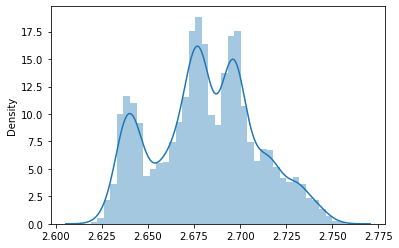

In [25]:
sns.distplot(transformed_data)
plt.show()

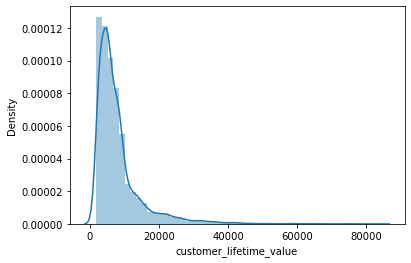

In [26]:
sns.distplot(numerical['customer_lifetime_value'])
plt.show()

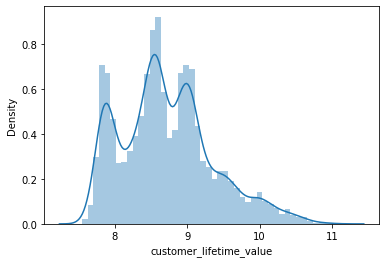

In [27]:
#using log
log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

numerical_new_1['customer_lifetime_value'] = numerical_new_1['customer_lifetime_value'].apply(log_lmbda)

numerical_new_1['customer_lifetime_value'] = numerical_new_1['customer_lifetime_value'].fillna(np.mean(numerical_new_1['customer_lifetime_value']))

sns.distplot(numerical_new_1['customer_lifetime_value'])
plt.show()

In [28]:
import pickle

In [29]:
#using pickle
transformer = Normalizer() 
transformer.fit(X_num) 

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized)
x_normalized.shape

(8681, 7)